In [1]:
import pandas as pd
import numpy as np
from python_codes import classification_framework as cf
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./data/cheap_train_sample.csv")

In [3]:
data.shape

(6513, 14)

In [4]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
wage              0
dtype: int64

In [5]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,56,Private,346033,9th,5,Divorced,Adm-clerical,Not-in-family,Male,0,0,40,United-States,<=50K
1,28,Private,96226,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Male,0,0,45,United-States,<=50K
2,33,Private,251120,Bachelors,13,Married-civ-spouse,Sales,Husband,Male,7688,0,50,United-States,>50K
3,26,Private,178140,Bachelors,13,Married-civ-spouse,Other-service,Husband,Male,0,0,45,United-States,>50K
4,40,Federal-gov,56795,Masters,14,Never-married,Exec-managerial,Not-in-family,Female,14084,0,55,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6508,29,Private,198997,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,Female,0,0,20,United-States,<=50K
6509,17,Private,46496,11th,7,Never-married,Other-service,Own-child,Male,0,0,5,United-States,<=50K
6510,31,Local-gov,381153,Some-college,10,Married-civ-spouse,Protective-serv,Husband,Male,15024,0,56,United-States,>50K
6511,35,Private,385412,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Female,0,0,40,United-States,<=50K


In [37]:
cdata = data.copy()

In [7]:
def something(x):
    return 1 if x == " Married-AF-spouse" or x == " Married-civ-spouse" else 0
cdata["marital-status"] = cdata["marital-status"].map(something)

In [8]:
cdata.groupby("marital-status")["wage"].value_counts()

marital-status  wage  
0                <=50K    3303
                 >50K      225
1                <=50K    1642
                 >50K     1343
Name: wage, dtype: int64

In [366]:
1343/(1343+1642)

0.44991624790619766

In [367]:
225/(225+3303)

0.06377551020408163

In [38]:
def map_country(x):
    return 1 if x == " United-States" else 0

# cdata[cdata["native-country"] ==  ' United-States']
cdata["native-country"] = cdata["native-country"].map(map_country)

In [39]:
cdata["native-country"].unique()

array([1, 0])

In [40]:
cdata["wage"] = cdata["wage"].map({' <=50K':0, ' >50K': 1})

In [41]:
cdata["wage"].value_counts()

0    4945
1    1568
Name: wage, dtype: int64

In [42]:
#binning the age
##bin the age
def bin_age(x):
    m = x  % 10
    if m <= 5:
        return int(x - m)
    else:
        return int(np.ceil(x/10) * 10)
    
#highlight minimum value form the data frame
def highlight_min(s):    
    is_min = s == s.min()
    return ['background-color: lightgreen' if v else '' for v in is_min]

#highlight max value from the data frame
def highlight_max(s):    
    is_max = s == s.max()
    return ['background-color: lightgreen' if v else '' for v in is_max]

In [43]:
cdata["bin_age"] = cdata["age"].map(bin_age)

In [44]:
cdata["bin_age"].unique()

array([60, 30, 40, 70, 50, 20, 80, 90])

In [45]:
cdata["new_yrs_of_exp"] = cdata["age"] - 17

In [46]:
cdata["bin_hours-per-week"] = cdata["hours-per-week"].map(bin_age)

In [47]:
# cdata["new_net_capital"] = cdata["capital-gain"] - cdata["capital-loss"]

In [48]:
# cdata.drop(columns=["fnlwgt", "education", "capital-gain", "capital-loss", "native-country"], inplace=True)
cdata.drop(columns=["fnlwgt", "education", "capital-gain", "capital-loss"], inplace=True)

In [49]:
cdata = pd.get_dummies(cdata, columns=["workclass", "marital-status", "relationship", "occupation", "sex"])

In [50]:
cdata.shape

(6513, 47)

In [51]:
feature_list_2 = list(cdata.columns)

In [52]:
feature_list_2.remove("wage")

In [28]:
feature_list = ['age',
 'education-num',
 'hours-per-week',
 'wage',
 'bin_age',
 'bin_hours-per-week',
 'workclass_ ?',
 'workclass_ Federal-gov',
 'workclass_ Local-gov',
 'workclass_ Never-worked',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_ Without-pay',
 'marital-status_ Divorced',
 'marital-status_ Married-AF-spouse',
 'marital-status_ Married-civ-spouse',
 'marital-status_ Married-spouse-absent',
 'marital-status_ Never-married',
 'marital-status_ Separated',
 'marital-status_ Widowed',
 'occupation_ ?',
 'occupation_ Adm-clerical',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Machine-op-inspct',
 'occupation_ Other-service',
 'occupation_ Priv-house-serv',
 'occupation_ Prof-specialty',
 'occupation_ Protective-serv',
 'occupation_ Sales',
 'occupation_ Tech-support',
 'occupation_ Transport-moving',
 'relationship_ Husband',
 'relationship_ Not-in-family',
 'relationship_ Other-relative',
 'relationship_ Own-child',
 'relationship_ Unmarried',
 'relationship_ Wife',
 'sex_ Female',
 'sex_ Male']

In [53]:
best_scores = cf.get_best_scores_params(cdata,"wage", feature_list_2)

Feature Selection completed for 1
Feature Selection completed for 2
Feature Selection completed for 3
Feature Selection completed for 7
Feature Selection completed for 8
Feature Selection completed for 9
Feature Selection completed for 10
Feature Selection completed for 12
Feature Selection completed..
Round 1 complete for feature set 1
Round 1 complete for feature set 2
Round 2 complete for feature set 1
Round 2 complete for feature set 2
Round 3 complete for feature set 1
Round 3 complete for feature set 2
Round 4 complete for feature set 1
Round 5 complete for feature set 1
Round 6 complete for feature set 1
Round 7 complete for feature set 1
Round 7 complete for feature set 2
Round 8 complete for feature set 1
Round 8 complete for feature set 2
Round 9 complete for feature set 1
Round 9 complete for feature set 2
Round 10 complete for feature set 1
Round 10 complete for feature set 2
Round 11 complete for feature set 1
Round 12 complete for feature set 1
Round 12 complete for featu

In [54]:
metrics_dict = {fno: {cfn: [] for cfn in range(1,len(best_scores[1])+1)} for fno in range(1,len(best_scores)+1)}
metrics_mis_dict = {fno: {cfn: [] for cfn in range(1,len(best_scores[1])+1)} for fno in range(1,len(best_scores)+1)}

In [55]:
for cfn in range(1,len(best_scores[1])+1):
    for feature_no in range(1,len(best_scores)+1):
        try:
            metrics_dict[feature_no][cfn] = best_scores[feature_no][cfn][0]
            metrics_mis_dict[feature_no][cfn] = best_scores[feature_no][cfn][2]["Mis Calculations"]
        except:
            metrics_dict[feature_no][cfn] = 0
            metrics_mis_dict[feature_no][cfn] = float("inf")

In [56]:
pd.DataFrame(metrics_dict).style.apply(highlight_max)

,1,2
1,0.83,0.82
2,0.83,0.82
3,0.76,0.75
4,0.82,0
5,0.8,0
6,0.66,0
7,0.81,0.81
8,0.8,0.79
9,0.8,0.79
10,0.83,0.83


In [57]:
pd.DataFrame(metrics_mis_dict).style.apply(highlight_min)

,1,2
1,0.17,0.18
2,0.17,0.18
3,0.24,0.26
4,0.17,inf
5,0.19,inf
6,0.35,inf
7,0.19,0.19
8,0.17,0.2
9,0.19,0.21
10,0.16,0.17


In [58]:
best_scores[1][10]

[0.83,
 {'classifier__learning_rate': 0.1,
  'classifier__max_depth': 3,
  'classifier__n_estimators': 100},
 {'Not eligible for 401k': 1738,
  'Eligible for 401k': 412,
  'Baseline accuracy%': 0.76,
  'Train Scores': 0.85,
  'Test Scores': 0.84,
  'Accuracy': 0.84,
  'Mis Calculations': 0.16,
  'Sensitivity': 0.56,
  'Specificity': 0.92,
  'Precision': 0.7,
  'ROC AUC': 0.89,
  'F1 score Train': 0.66,
  'F1 score Test': 0.62,
  'Log Loss score': 5.65,
  'Fit Type': 'Overfit'}]

In [178]:
best_scores[1][8]

[0.8,
 {},
 {'Not eligible for 401k': 1784,
  'Eligible for 401k': 366,
  'Baseline accuracy%': 0.76,
  'Train Scores': 0.97,
  'Test Scores': 0.83,
  'Accuracy': 0.83,
  'Mis Calculations': 0.17,
  'Sensitivity': 0.49,
  'Specificity': 0.93,
  'Precision': 0.7,
  'ROC AUC': 0.85,
  'F1 score Train': 0.94,
  'F1 score Test': 0.58,
  'Log Loss score': 6.01,
  'Fit Type': 'Overfit'}]

In [59]:
X = cdata.drop(columns=["wage"])
y = cdata["wage"]

In [60]:
len(list(X.columns))

46

In [61]:
from sklearn.pipeline import Pipeline
# Step 1 : split the data into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y, test_size=0.33, random_state=42)

pipe = Pipeline([('classifier', GradientBoostingClassifier(random_state=42))])
hyper_params = {}

# Perform Grid Search
gridcv = GridSearchCV(pipe,
                      param_grid=hyper_params,
                      cv=5,
                      scoring="roc_auc")
# results
results = gridcv.fit(X_train, y_train)

In [62]:
cf.get_score_data(results, X_train, X_test, y_train, y_test)

[0.88,
 {},
 {'Not eligible for 401k': 1738,
  'Eligible for 401k': 412,
  'Baseline accuracy%': 0.76,
  'Train Scores': 0.85,
  'Test Scores': 0.84,
  'Accuracy': 0.84,
  'Mis Calculations': 0.16,
  'Sensitivity': 0.56,
  'Specificity': 0.92,
  'Precision': 0.7,
  'ROC AUC': 0.89,
  'F1 score Train': 0.66,
  'F1 score Test': 0.62,
  'Log Loss score': 5.65,
  'Fit Type': 'Overfit'}]

In [63]:
results.score(X_train, y_train)

0.9174339183303867

In [64]:
results.score(X_test, y_test)

0.8909603537360891

In [65]:
cdata["y"] = results.predict(X)

In [66]:
cdata.shape

(6513, 48)

In [67]:
cdata[cdata["wage"] == cdata["y"]]

,age,education-num,hours-per-week,native-country,wage,bin_age,new_yrs_of_exp,bin_hours-per-week,workclass_ ?,workclass_ Federal-gov,...,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,sex_ Female,sex_ Male,y
0,56,5,40,1,0,60,39,40,0,0,...,0,0,0,0,0,0,0,0,1,0
1,28,9,45,1,0,30,11,40,0,0,...,0,0,0,0,0,0,0,0,1,0
2,33,13,50,1,1,30,16,50,0,0,...,0,0,0,0,1,0,0,0,1,1
4,40,14,55,1,1,40,23,50,0,1,...,0,0,0,0,0,0,0,1,0,1
5,66,9,40,1,0,70,49,40,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6508,29,9,20,1,0,30,12,20,0,0,...,0,0,0,0,0,0,0,1,0,0
6509,17,7,5,1,0,20,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
6510,31,10,56,1,1,30,14,60,0,0,...,0,0,0,1,0,0,0,0,1,1
6511,35,13,40,1,0,30,18,40,0,0,...,0,0,0,0,0,0,0,1,0,0


In [285]:
cdata[cdata["wage"] != cdata["y"]]

,age,education-num,hours-per-week,native-country,wage,bin_age,new_yrs_of_exp,bin_hours-per-week,workclass_ ?,workclass_ Federal-gov,...,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,sex_ Female,sex_ Male,y
3,26,13,45,1,1,30,9,40,0,0,...,1,0,0,0,0,0,0,0,1,0
6,30,11,35,0,0,30,13,30,0,0,...,0,0,0,0,0,1,0,1,0,1
10,64,9,15,1,1,60,47,10,0,0,...,0,0,0,0,1,0,0,0,1,0
13,42,9,40,1,1,40,25,40,0,0,...,0,0,0,0,0,0,0,0,1,0
20,55,6,50,1,1,50,38,50,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6494,38,13,40,1,0,40,21,40,0,0,...,0,0,0,0,0,0,0,0,1,1
6495,27,10,50,0,1,30,10,50,0,0,...,0,0,0,0,0,0,1,0,1,0
6500,46,8,35,1,1,50,29,30,0,0,...,1,0,0,0,0,0,0,0,1,0
6503,41,14,50,1,0,40,24,50,0,0,...,0,0,1,0,0,0,0,0,1,1


In [270]:
996/(996+5517)

0.15292491939198527

In [271]:
985/(985+5528)

0.15123598955934286

In [307]:
pred_proba = [i[1] for i in results.predict_proba(X)]

pred_df = pd.DataFrame({'true_values': cdata["wage"],
                        'pred_probs':pred_proba,
                        'pred_values': cdata["y"]})

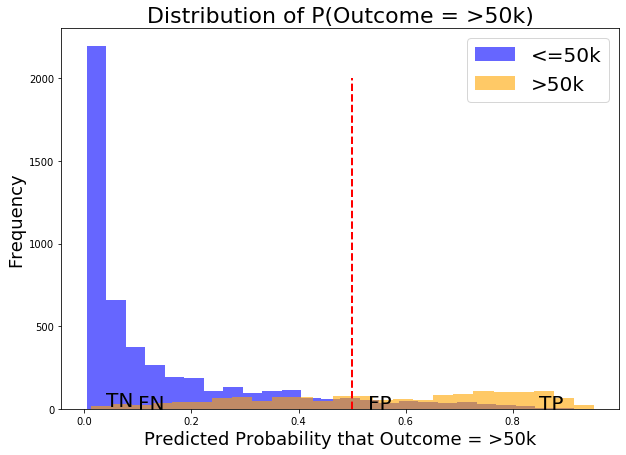

In [310]:
# Create figure.
plt.figure(figsize = (10,7))

# Create two histograms of observations.
plt.hist(pred_df[pred_df['true_values'] == 0]['pred_probs'],
         bins = 25,
         color = 'b',
         alpha = 0.6,
         label = '<=50k')
plt.hist(pred_df[pred_df['true_values'] == 1]['pred_probs'],
         bins = 25,
         color = 'orange',
         alpha = 0.6,
         label = '>50k')

# Add vertical line at P(Outcome = 1) = 0.5.
plt.vlines(x = 0.5,
           ymin = 0,
           ymax = 2000,
           color = 'r',
           linestyle = '--',
           linewidth=2)

# Add annotations for TN, FN, TP, FP.
plt.annotate(xy = (0.04, 15),
             s = 'TN',
             size = 20)

plt.annotate(xy = (0.1, 0),
             s = 'FN',
             size = 20)

plt.annotate(xy = (0.85, 1),
             s = 'TP',
             size = 20)

plt.annotate(xy = (0.53, 1),
             s = 'FP',
             size = 20)

# Label axes.
plt.title('Distribution of P(Outcome = >50k)', fontsize = 22)
plt.ylabel('Frequency', fontsize = 18)
plt.xlabel('Predicted Probability that Outcome = >50k', fontsize = 18)

# Create legend.
plt.legend(fontsize = 20);

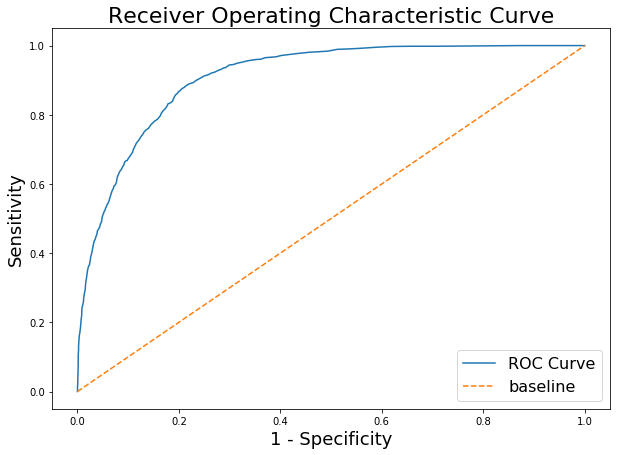

In [311]:
import numpy as np

# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values.
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title('Receiver Operating Characteristic Curve', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

In [68]:
test_data = pd.read_csv("./data/test_data.csv")

In [69]:
test_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Male,7688,0,40,United-States
4,18,?,103497,Some-college,10,Never-married,?,Own-child,Female,0,0,30,United-States


PREPARE THE TEST DATA

In [70]:
ctest_data = test_data.copy()

In [71]:
ctest_data["native-country"] = ctest_data["native-country"].map(map_country)

In [72]:
ctest_data["native-country"].unique()

array([1, 0])

In [73]:
ctest_data["bin_age"] = ctest_data["age"].map(bin_age)

In [74]:
ctest_data["bin_age"].unique()

array([20, 40, 30, 60, 50, 70, 80, 90])

In [75]:
ctest_data["new_yrs_of_exp"]  = ctest_data["age"] - 17

In [76]:
ctest_data["bin_hours-per-week"] = ctest_data["hours-per-week"].map(bin_age)

In [77]:
ctest_data.drop(columns=["fnlwgt", "education", "capital-gain", "capital-loss"], inplace=True)

In [78]:
ctest_data = pd.get_dummies(ctest_data, columns=["workclass", "marital-status", "relationship", "occupation", "sex"])

In [79]:
ctest_data.shape

(16281, 46)

In [80]:
for x in list(X.columns):
    if x not in list(ctest_data.columns):
        print(x)

In [81]:
ctest_data["y"] = results.predict(ctest_data)

In [82]:
ctest_data["y"].value_counts()

0    13111
1     3170
Name: y, dtype: int64

In [298]:
submission_df = pd.DataFrame(results.predict_proba(ctest_data), columns=["<=50k", ">50k"])

In [302]:
# submission_df[">50k"].to_csv("./data/Casey_Mac_Gouri_submission.csv", index=False)

In [303]:
herewego  = pd.read_csv("./data/Casey_Mac_Gouri_submission.csv")

In [304]:
herewego

,wage
0,0.018752
1,0.152187
2,0.482068
3,0.416371
4,0.005717
...,...
16276,0.077860
16277,0.105982
16278,0.821703
16279,0.146984


Adding more values with 1

In [330]:
random_df = cdata.copy()
random_df.drop(columns=["y"], inplace=True)

In [331]:
random_df1= random_df[random_df["wage"]==1].sample(n=2_000, random_state=42, replace=True)

In [332]:
random_df1["wage"].value_counts()

1    2000
Name: wage, dtype: int64

In [333]:
cdata["wage"].value_counts()

0    4945
1    1568
Name: wage, dtype: int64

In [334]:
random_df = pd.concat((random_df, random_df1), axis=0)

In [335]:
random_df["wage"].value_counts()

0    4945
1    3568
Name: wage, dtype: int64

In [336]:
Xy = random_df.drop(columns=["wage"])

In [341]:
Xy.columns

Index(['age', 'education-num', 'hours-per-week', 'native-country', 'bin_age',
       'new_yrs_of_exp', 'bin_hours-per-week', 'workclass_ ?',
       'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay',
       'marital-status_ Divorced', 'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'relationship_ Husband',
       'relationship_ Not-in-family', 'relationship_ Other-relative',
       'relationship_ Own-child', 'relationship_ Unmarried',
       'relationship_ Wife', 'occupation_ ?', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fish

In [343]:
y = random_df["wage"]

In [344]:
X_train, X_test, y_train, y_test = train_test_split(Xy, y, shuffle=True, stratify=y, test_size=0.33, random_state=42)

pipe = Pipeline([('classifier', GradientBoostingClassifier(random_state=42))])
hyper_params = {}

# Perform Grid Search
gridcv = GridSearchCV(pipe,
                      param_grid=hyper_params,
                      cv=5,
                      scoring="roc_auc")
# results
results = gridcv.fit(X_train, y_train)

In [345]:
results.score(X_train, y_train)

0.9177099975120201

In [346]:
results.score(X_test, y_test)

0.9005852287859117

In [350]:
random_df["y"] = results.predict(Xy)

In [352]:
pred_proba = [i[1] for i in results.predict_proba(Xy)]

pred_df = pd.DataFrame({'true_values': random_df["wage"],
                        'pred_probs':pred_proba,
                        'pred_values': random_df["y"]})

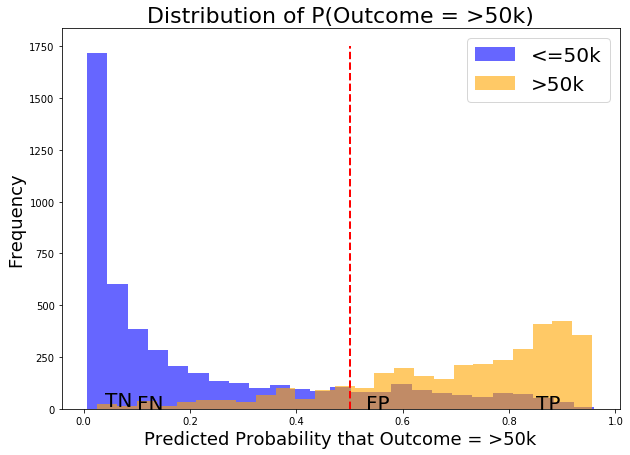

In [354]:
# Create figure.
plt.figure(figsize = (10,7))

# Create two histograms of observations.
plt.hist(pred_df[pred_df['true_values'] == 0]['pred_probs'],
         bins = 25,
         color = 'b',
         alpha = 0.6,
         label = '<=50k')
plt.hist(pred_df[pred_df['true_values'] == 1]['pred_probs'],
         bins = 25,
         color = 'orange',
         alpha = 0.6,
         label = '>50k')

# Add vertical line at P(Outcome = 1) = 0.5.
plt.vlines(x = 0.5,
           ymin = 0,
           ymax = 1750,
           color = 'r',
           linestyle = '--',
           linewidth=2)

# Add annotations for TN, FN, TP, FP.
plt.annotate(xy = (0.04, 15),
             s = 'TN',
             size = 20)

plt.annotate(xy = (0.1, 0),
             s = 'FN',
             size = 20)

plt.annotate(xy = (0.85, 1),
             s = 'TP',
             size = 20)

plt.annotate(xy = (0.53, 1),
             s = 'FP',
             size = 20)

# Label axes.
plt.title('Distribution of P(Outcome = >50k)', fontsize = 22)
plt.ylabel('Frequency', fontsize = 18)
plt.xlabel('Predicted Probability that Outcome = >50k', fontsize = 18)

# Create legend.
plt.legend(fontsize = 20);